Chapter 15
# NumPy常见运算
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import cm 
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 自定义函数

In [2]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".2f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title, vmax, vmin):
    fig, ax = plt.subplots()
    
    cmap = plt.colormaps.get_cmap("RdYlBu")
    
    array_norm = (array - vmin) / (vmax - vmin)

    colors = cmap(array_norm)

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = "{:.1f}".format(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 加减乘除、乘幂

### 一维

#### 定义数组

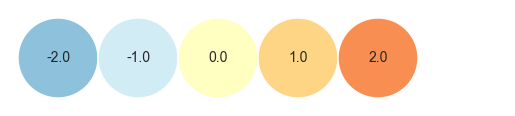

In [17]:
a_1D = np.arange(-2,2+1)
visualize_1D(a_1D, '一维数组', -4, 4)

In [5]:
all_twos = 2*np.ones_like(a_1D)
all_twos

array([2, 2, 2, 2, 2])

In [6]:
np.full_like(a_1D, 2)

array([2, 2, 2, 2, 2])

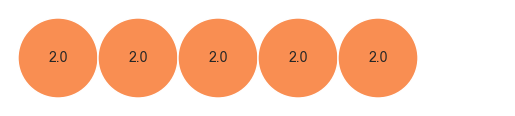

In [7]:
visualize_1D(all_twos, '一维数组，全2', -4, 4)

#### 加法

In [8]:
a_1D + all_twos

array([0, 1, 2, 3, 4])

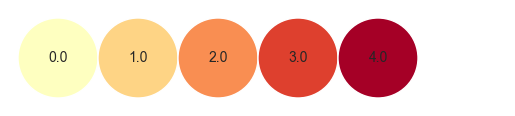

In [9]:
visualize_1D(a_1D + all_twos, '一维数组，加法', -4, 4)

In [10]:
np.add(a_1D, all_twos)

array([0, 1, 2, 3, 4])

#### 减法

In [18]:
a_1D - all_twos

array([-4, -3, -2, -1,  0])

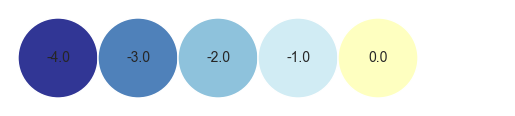

In [19]:
visualize_1D(a_1D - all_twos, '一维数组，减法', -4, 4)

In [21]:
np.subtract(a_1D, all_twos)

array([-4, -3, -2, -1,  0])

#### 乘法

In [22]:
a_1D * all_twos

array([-4, -2,  0,  2,  4])

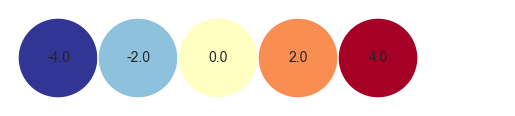

In [23]:
visualize_1D(a_1D * all_twos, '一维数组，乘法', -4, 4)

In [24]:
np.multiply(a_1D, all_twos)

array([-4, -2,  0,  2,  4])

#### 除法

In [25]:
a_1D/all_twos

array([-1. , -0.5,  0. ,  0.5,  1. ])

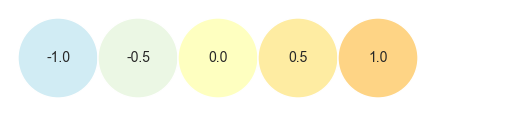

In [26]:
visualize_1D(a_1D/all_twos, '一维数组，除法', -4, 4)

In [27]:
np.divide(a_1D, all_twos)

array([-1. , -0.5,  0. ,  0.5,  1. ])

#### 乘幂

In [28]:
a_1D ** all_twos

array([4, 1, 0, 1, 4])

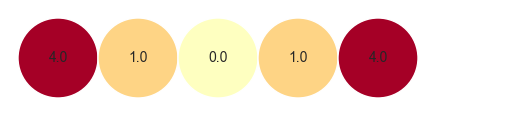

In [29]:
visualize_1D(a_1D ** all_twos, '一维数组，乘幂', -4, 4)

In [30]:
np.power(a_1D,all_twos)

array([4, 1, 0, 1, 4])

### 二维数组

In [32]:
a_2D = np.random.uniform(-1, 1, (4,6))
a_2D

array([[-0.13390942,  0.72685593, -0.76520298, -0.93667718, -0.69979009,
         0.72722755],
       [ 0.7380666 , -0.57802028,  0.69694345, -0.90273512, -0.05983721,
        -0.33607254],
       [-0.52044918, -0.9829721 ,  0.5396961 ,  0.31312802,  0.72587988,
        -0.35267027],
       [ 0.1947464 ,  0.29844684,  0.82822554, -0.00527989, -0.81417014,
         0.01937359]])

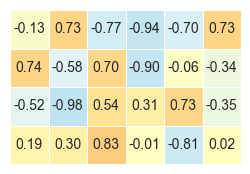

In [33]:
visualize_2D(a_2D, '二维数组', 3, -3)

In [34]:
all_twos_2D = np.full_like(a_2D, 2)
all_twos_2D

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

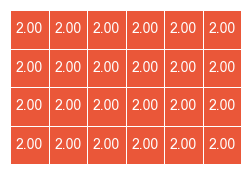

In [35]:
visualize_2D(all_twos_2D, '二维，全2', 3, -3)

#### 加法

In [36]:
a_2D + all_twos_2D

array([[1.86609058, 2.72685593, 1.23479702, 1.06332282, 1.30020991,
        2.72722755],
       [2.7380666 , 1.42197972, 2.69694345, 1.09726488, 1.94016279,
        1.66392746],
       [1.47955082, 1.0170279 , 2.5396961 , 2.31312802, 2.72587988,
        1.64732973],
       [2.1947464 , 2.29844684, 2.82822554, 1.99472011, 1.18582986,
        2.01937359]])

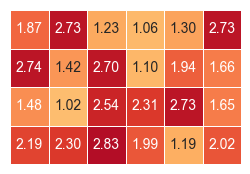

In [37]:
visualize_2D(a_2D + all_twos_2D, '二维加法', 3, -3)

#### 减法

In [38]:
a_2D - all_twos_2D

array([[-2.13390942, -1.27314407, -2.76520298, -2.93667718, -2.69979009,
        -1.27277245],
       [-1.2619334 , -2.57802028, -1.30305655, -2.90273512, -2.05983721,
        -2.33607254],
       [-2.52044918, -2.9829721 , -1.4603039 , -1.68687198, -1.27412012,
        -2.35267027],
       [-1.8052536 , -1.70155316, -1.17177446, -2.00527989, -2.81417014,
        -1.98062641]])

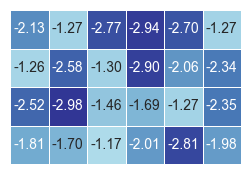

In [39]:
visualize_2D(a_2D - all_twos_2D, '二维减法', 3, -3)

#### 乘法

In [40]:
a_2D * all_twos_2D

array([[-0.26781884,  1.45371185, -1.53040596, -1.87335437, -1.39958018,
         1.4544551 ],
       [ 1.47613321, -1.15604057,  1.39388689, -1.80547023, -0.11967442,
        -0.67214508],
       [-1.04089836, -1.9659442 ,  1.07939219,  0.62625603,  1.45175975,
        -0.70534053],
       [ 0.3894928 ,  0.59689367,  1.65645109, -0.01055979, -1.62834028,
         0.03874718]])

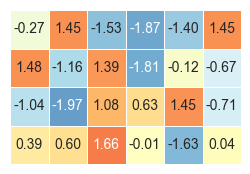

In [41]:
visualize_2D(a_2D * all_twos_2D, '二维乘法', 3, -3)

#### 除法

In [42]:
a_2D / all_twos_2D

array([[-0.06695471,  0.36342796, -0.38260149, -0.46833859, -0.34989504,
         0.36361378],
       [ 0.3690333 , -0.28901014,  0.34847172, -0.45136756, -0.02991861,
        -0.16803627],
       [-0.26022459, -0.49148605,  0.26984805,  0.15656401,  0.36293994,
        -0.17633513],
       [ 0.0973732 ,  0.14922342,  0.41411277, -0.00263995, -0.40708507,
         0.0096868 ]])

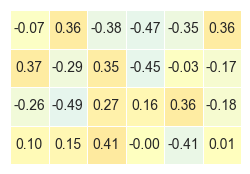

In [43]:
visualize_2D(a_2D / all_twos_2D, '二维除法', 3, -3)

#### 乘幂

In [44]:
a_2D ** all_twos_2D

array([[1.79317329e-02, 5.28319536e-01, 5.85535598e-01, 8.77364149e-01,
        4.89706167e-01, 5.28859911e-01],
       [5.44742312e-01, 3.34107449e-01, 4.85730167e-01, 8.14930692e-01,
        3.58049172e-03, 1.12944754e-01],
       [2.70867346e-01, 9.66234147e-01, 2.91271877e-01, 9.80491552e-02,
        5.26901596e-01, 1.24376316e-01],
       [3.79261595e-02, 8.90705140e-02, 6.85957550e-01, 2.78772656e-05,
        6.62873019e-01, 3.75336051e-04]])

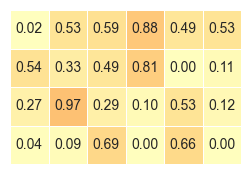

In [45]:
visualize_2D(a_2D ** all_twos_2D, '二维乘幂', 3, -3)

## 广播原则

### 一维

In [46]:
a_1D + 2

array([0, 1, 2, 3, 4])

In [47]:
a_1D - 2

array([-4, -3, -2, -1,  0])

In [48]:
a_1D * 2

array([-4, -2,  0,  2,  4])

In [49]:
a_1D / 2

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [50]:
a_1D ** 2

array([4, 1, 0, 1, 4])

In [51]:
a_1D % 2

array([0, 1, 0, 1, 0])

### 一维数组、列向量运算

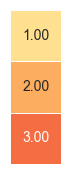

In [52]:
visualize_2D(np.array([[1], [2], [3]]), '列向量，二维', 5, -5)

In [53]:
a_1D + np.array([[1], [2], [3]])

array([[-1,  0,  1,  2,  3],
       [ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5]])

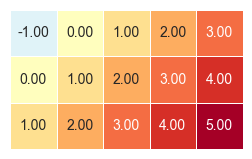

In [54]:
visualize_2D(a_1D + np.array([[1], [2], [3]]), '一维数组、列向量运算，加法', 5, -5)

In [55]:
a_1D * np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [-4, -2,  0,  2,  4],
       [-6, -3,  0,  3,  6]])

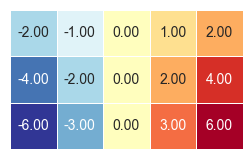

In [56]:
visualize_2D(a_1D * np.array([[1], [2], [3]]), '一维数组、列向量运算，乘法', 5, -5)

In [57]:
a_1D ** np.array([[1], [2], [3]])

array([[-2, -1,  0,  1,  2],
       [ 4,  1,  0,  1,  4],
       [-8, -1,  0,  1,  8]])

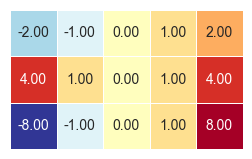

In [58]:
visualize_2D(a_1D ** np.array([[1], [2], [3]]), '一维数组、列向量运算，乘幂', 5, -5)

### 二维数组和标量

#### 加法

In [59]:
a_2D + 2

array([[1.86609058, 2.72685593, 1.23479702, 1.06332282, 1.30020991,
        2.72722755],
       [2.7380666 , 1.42197972, 2.69694345, 1.09726488, 1.94016279,
        1.66392746],
       [1.47955082, 1.0170279 , 2.5396961 , 2.31312802, 2.72587988,
        1.64732973],
       [2.1947464 , 2.29844684, 2.82822554, 1.99472011, 1.18582986,
        2.01937359]])

### 二维数组和一维数组

In [60]:
np.linspace(-1,1,6)

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [61]:
np.broadcast_to(np.linspace(-1,1,6), (4, 6))

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ],
       [-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

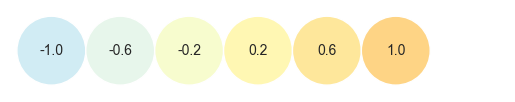

In [62]:
visualize_1D(np.linspace(-1,1,6), '一维数组，6个元素', -4, 4)

In [63]:
a_2D + np.linspace(-1,1,6)

array([[-1.13390942,  0.12685593, -0.96520298, -0.73667718, -0.09979009,
         1.72722755],
       [-0.2619334 , -1.17802028,  0.49694345, -0.70273512,  0.54016279,
         0.66392746],
       [-1.52044918, -1.5829721 ,  0.3396961 ,  0.51312802,  1.32587988,
         0.64732973],
       [-0.8052536 , -0.30155316,  0.62822554,  0.19472011, -0.21417014,
         1.01937359]])

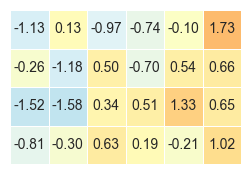

In [64]:
visualize_2D(a_2D + np.linspace(-1,1,6), '二维数组和一维数组，加法', 5, -5)

In [65]:
# 行向量
np.linspace(-1,1,6).reshape(1,-1)

array([[-1. , -0.6, -0.2,  0.2,  0.6,  1. ]])

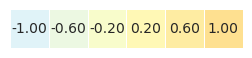

In [137]:
visualize_2D(np.linspace(-1,1,6).reshape(1,-1), '行向量，6个元素', 5, -5)

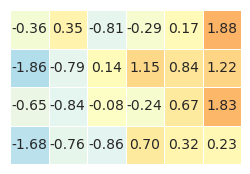

In [135]:
visualize_2D(a_2D + np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，加法', 5, -5)

In [66]:
a_2D * np.linspace(-1,1,6)

array([[ 0.13390942, -0.43611356,  0.1530406 , -0.18733544, -0.41987405,
         0.72722755],
       [-0.7380666 ,  0.34681217, -0.13938869, -0.18054702, -0.03590233,
        -0.33607254],
       [ 0.52044918,  0.58978326, -0.10793922,  0.0626256 ,  0.43552793,
        -0.35267027],
       [-0.1947464 , -0.1790681 , -0.16564511, -0.00105598, -0.48850208,
         0.01937359]])

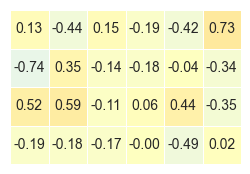

In [67]:
visualize_2D(a_2D * np.linspace(-1,1,6), '二维数组和一维数组，乘法', 5, -5)

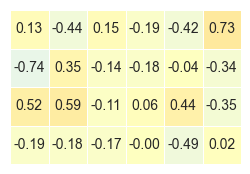

In [68]:
visualize_2D(a_2D * np.linspace(-1,1,6).reshape(1,-1), '二维数组和行向量，乘法', 5, -5)

In [69]:
a_2D + np.array([-2, -1, 0, 1])
# 报错

ValueError: operands could not be broadcast together with shapes (4,6) (4,) 

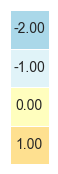

In [70]:
visualize_2D(np.array([[-2], [-1], [0], [1]]), '列向量，4个元素', 5, -5)

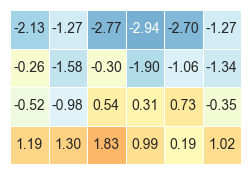

In [71]:
visualize_2D(a_2D + np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，加法', 5, -5)

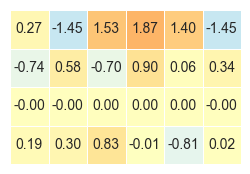

In [72]:
visualize_2D(a_2D * np.array([[-2], [-1], [0], [1]]), '二维数组和列向量，乘法', 5, -5)

### 三维

In [73]:
A_3D = np.arange(-30, 30).reshape(3,4,5)
A_3D

array([[[-30, -29, -28, -27, -26],
        [-25, -24, -23, -22, -21],
        [-20, -19, -18, -17, -16],
        [-15, -14, -13, -12, -11]],

       [[-10,  -9,  -8,  -7,  -6],
        [ -5,  -4,  -3,  -2,  -1],
        [  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]],

       [[ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29]]])

In [74]:
A_3D + 2

array([[[-28, -27, -26, -25, -24],
        [-23, -22, -21, -20, -19],
        [-18, -17, -16, -15, -14],
        [-13, -12, -11, -10,  -9]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 12,  13,  14,  15,  16],
        [ 17,  18,  19,  20,  21],
        [ 22,  23,  24,  25,  26],
        [ 27,  28,  29,  30,  31]]])

In [75]:
A_3D + np.arange(1,5+1)

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [76]:
np.array([[[1, 2, 3, 4, 5]]])

array([[[1, 2, 3, 4, 5]]])

In [77]:
A_3D + np.array([[[1, 2, 3, 4, 5]]])

array([[[-29, -27, -25, -23, -21],
        [-24, -22, -20, -18, -16],
        [-19, -17, -15, -13, -11],
        [-14, -12, -10,  -8,  -6]],

       [[ -9,  -7,  -5,  -3,  -1],
        [ -4,  -2,   0,   2,   4],
        [  1,   3,   5,   7,   9],
        [  6,   8,  10,  12,  14]],

       [[ 11,  13,  15,  17,  19],
        [ 16,  18,  20,  22,  24],
        [ 21,  23,  25,  27,  29],
        [ 26,  28,  30,  32,  34]]])

In [78]:
np.array([[[1]],[[2]],[[3]]])

array([[[1]],

       [[2]],

       [[3]]])

In [79]:
A_3D + np.array([[[1]],[[2]],[[3]]])

array([[[-29, -28, -27, -26, -25],
        [-24, -23, -22, -21, -20],
        [-19, -18, -17, -16, -15],
        [-14, -13, -12, -11, -10]],

       [[ -8,  -7,  -6,  -5,  -4],
        [ -3,  -2,  -1,   0,   1],
        [  2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11]],

       [[ 13,  14,  15,  16,  17],
        [ 18,  19,  20,  21,  22],
        [ 23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32]]])

In [80]:
np.array([[[1],[2],[3],[4]]])

array([[[1],
        [2],
        [3],
        [4]]])

In [81]:
A_3D + np.array([[[1],[2],[3], [4]]])

array([[[-29, -28, -27, -26, -25],
        [-23, -22, -21, -20, -19],
        [-17, -16, -15, -14, -13],
        [-11, -10,  -9,  -8,  -7]],

       [[ -9,  -8,  -7,  -6,  -5],
        [ -3,  -2,  -1,   0,   1],
        [  3,   4,   5,   6,   7],
        [  9,  10,  11,  12,  13]],

       [[ 11,  12,  13,  14,  15],
        [ 17,  18,  19,  20,  21],
        [ 23,  24,  25,  26,  27],
        [ 29,  30,  31,  32,  33]]])

## 数学函数
NumPy有大量数学函数，这个笔记我们仅仅选取几个常用的数学函数，并可视化函数图形。

In [85]:
x_array = np.linspace(-4,4,81)
x_array

array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

In [87]:
import numpy as np
import matplotlib.pyplot as plt
# 自定义可视化函数
def visualize_fx(x_array, f_array, title, step = False):
    fig, ax = plt.subplots(figsize = (5,5))
    ax.plot([-5,5],[-5,5], c = 'r', ls = '--', lw = 0.5)
    if step:
        ax.step(x_array, f_array)
    else:
        ax.plot(x_array, f_array)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axvline(0, c = 'k')
    ax.axhline(0, c = 'k')
    ax.set_xticks(np.arange(-5, 5+1))
    ax.set_yticks(np.arange(-5, 5+1))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.grid(True)
    ax.set_aspect('equal', adjustable='box')
    fig.savefig(title + '.svg', format='svg')

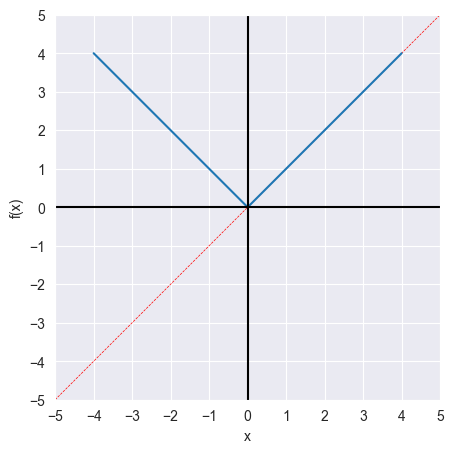

In [100]:
title = '绝对值函数'
visualize_fx(x_array, np.abs(x_array), title)

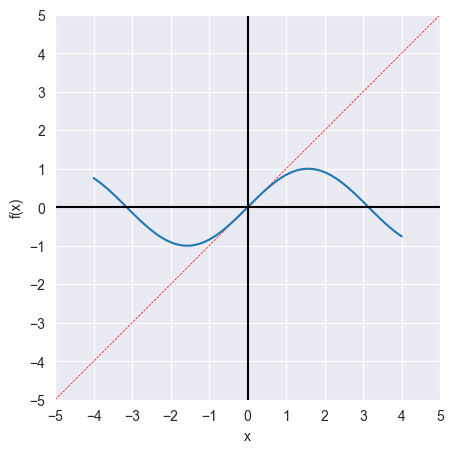

In [89]:
title = '正弦函数'
visualize_fx(x_array, np.sin(x_array), title)

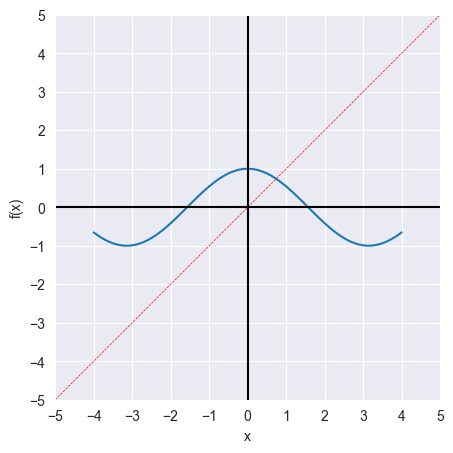

In [90]:
title = '余弦函数'
visualize_fx(x_array, np.cos(x_array), title)

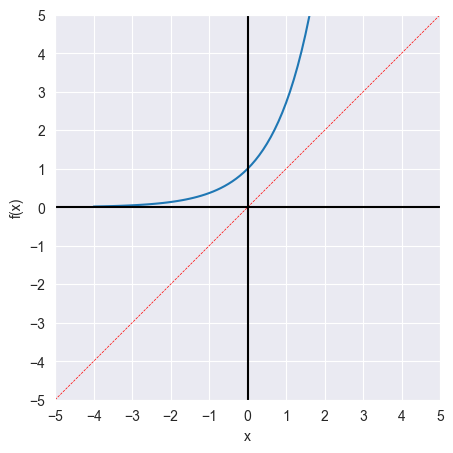

In [91]:
title = '指数函数'
visualize_fx(x_array, np.exp(x_array), title)
# 指数函数通常特指以e为底数的指数函数

In [92]:
# 请大家可视化更多一元函数

## 统计函数

In [93]:
A_2D = np.random.randint(0,10, size = (4,6))
A_2D

array([[3, 7, 4, 9, 2, 3],
       [8, 9, 2, 8, 0, 9],
       [4, 6, 8, 4, 3, 0],
       [1, 7, 3, 0, 7, 1]], dtype=int32)

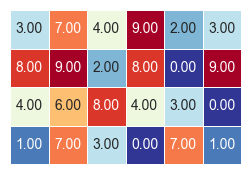

In [94]:
visualize_2D(A_2D, '二维数组', 9, 0)

In [95]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data_array = iris.data

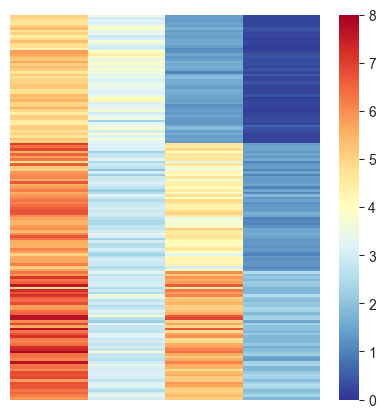

In [96]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(iris_data_array,   # 鸢尾花数据数组
            cmap = 'RdYlBu_r', # 指定色谱
            ax = ax,           # 指定轴
            vmax = 8,          # 色谱最大值
            vmin = 0,          # 色谱最小值
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据热图.svg', format='svg')

### 最大值

In [97]:
A_2D.max()

np.int32(9)

In [98]:
A_2D.max(axis = 0)

array([8, 9, 8, 9, 7, 9], dtype=int32)

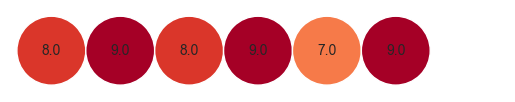

In [99]:
visualize_1D(A_2D.max(axis = 0), '沿axis = 0，最大值', 0, 9)

In [199]:
A_2D.max(axis = 1)

array([9, 8, 8, 9])

In [207]:
A_2D.max(axis = 1, keepdims = True)

array([[9],
       [8],
       [8],
       [9]])

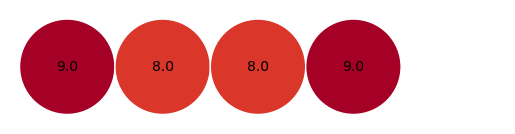

In [208]:
visualize_1D(A_2D.max(axis = 1), '沿axis = 1，最大值', 0, 9)

In [160]:
iris_data_array.max()

7.9

In [161]:
iris_data_array.max(axis = 0)

array([7.9, 4.4, 6.9, 2.5])

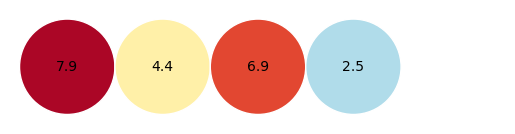

In [182]:
visualize_1D(iris_data_array.max(axis = 0), '鸢尾花沿axis = 0，最大值', 0, 8)

In [162]:
np.argmax(iris_data_array, axis=0)

array([131,  15, 118, 100], dtype=int64)

In [163]:
iris_data_array.max(axis = 1)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [164]:
np.argmax(iris_data_array, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 最小值

In [201]:
A_2D.min()

0

In [202]:
A_2D.min(axis = 0)

array([0, 3, 0, 2, 1, 1])

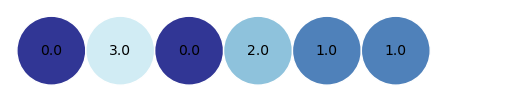

In [204]:
visualize_1D(A_2D.min(axis = 0), '鸢尾花沿axis = 0，最小值', 0, 8)

In [188]:
A_2D.min(axis = 1)

array([-7, -2,  3])

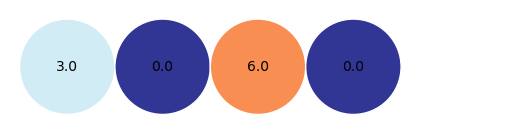

In [206]:
visualize_1D(A_2D.min(axis = 1), '鸢尾花沿axis = 1，最小值', 0, 8)

In [169]:
iris_data_array.min()

0.1

In [170]:
iris_data_array.min(axis = 0)

array([4.3, 2. , 1. , 0.1])

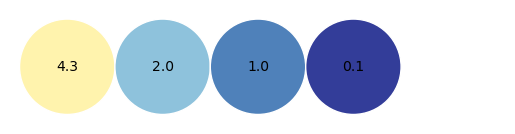

In [172]:
visualize_1D(iris_data_array.min(axis = 0), '沿axis = 0，最小值', 0, 8)

In [173]:
np.argmin(iris_data_array, axis=0)

array([13, 60, 22,  9], dtype=int64)

In [174]:
iris_data_array.min(axis = 1)

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

### 求和

In [ ]:
iris_data_array.sum()

In [ ]:
iris_data_array.sum(axis = 0)

In [ ]:
iris_data_array.sum(axis = 1)

### 平均值
$${\displaystyle \mu ={\frac {1}{n}}\sum _{i=1}^{n}x_{i}.} $$

In [101]:
np.average(iris_data_array)

np.float64(3.4644999999999997)

In [102]:
np.average(iris_data_array, axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [103]:
np.average(iris_data_array, axis = 1)

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.425, 2.4  ,
       2.625, 2.5  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

### 方差
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n - 1}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [104]:
np.var(iris_data_array)
# 注意，NumPy中默认分母为n

np.float64(3.896056416666667)

NumPy默认计算：
$${\displaystyle \operatorname {Var} (X)={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}$$

In [105]:
np.var(iris_data_array, axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [107]:
np.var(iris_data_array, axis = 0, ddof = 1)
# 将分母设为n - 1

array([0.68569351, 0.18997942, 3.11627785, 0.58100626])

### 标准差

In [108]:
np.std(iris_data_array, axis = 0)
# 注意，NumPy中默认分母为n

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

### 协方差矩阵

In [113]:
np.cov(iris_data_array.T, ddof = 1)
# 注意转置

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

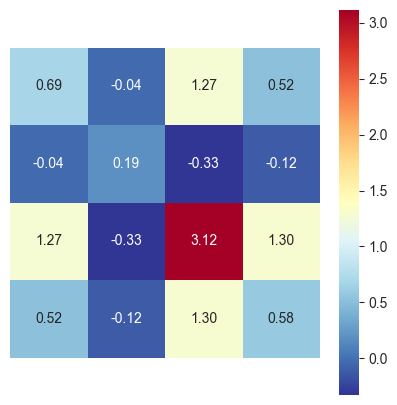

In [111]:
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.cov(iris_data_array.T, ddof = 1),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据协方差矩阵.svg', format='svg')

### 相关性系数矩阵

In [114]:
np.corrcoef(iris_data_array.T)
# 注意转置

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

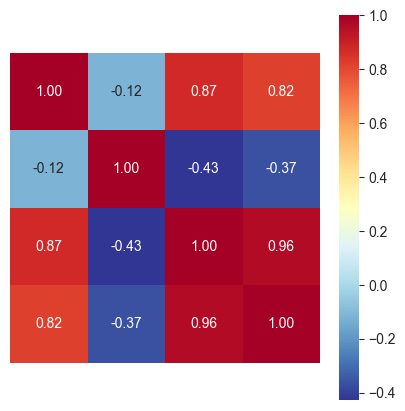

In [115]:

fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(np.corrcoef(iris_data_array.T),   
            cmap = 'RdYlBu_r', # 指定色谱
            annot = True,      # 注释
            ax = ax,           # 指定轴
            fmt = ".2f",       # 注释数值的格式
            square = True,     # 热图方格为正方形
            xticklabels = [],  # 不显示横轴标签
            yticklabels = [],  # 不显示纵轴标签
            cbar = True)       # 显示色谱条

fig.savefig('Figures/鸢尾花数据相关性系数矩阵.svg', format='svg')

请大家自行学习如下函数：  
numpy.percentile()  
numpy.quantile()  
numpy.median()   
numpy.nanmean()  
numpy.nanmedian()  
numpy.nanstd()  
numpy.nanvar()  

## 参考阅读

关于广播原则，请参考：  
https://numpy.org/doc/stable/user/basics.broadcasting.html  
有关数学函数，请参考：  
https://numpy.org/doc/stable/reference/routines.math.html  
有关统计函数，请参考：  
https://numpy.org/doc/stable/reference/routines.statistics.html  
有关逻辑函数，请参考：  
https://numpy.org/doc/stable/reference/routines.logic.html  

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023